In [1]:
import pypsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline
from pypsa.linopf import (get_var, define_constraints, linexpr, join_exprs,
                          network_lopf, ilopf)

In [2]:
basedir = "../" 
#basedir = "~/mnt/lin/pypsa-eur/"

In [3]:
# Perfect foresight:  sovled network
n2013 = pypsa.Network(basedir + "networks/2013_de/elec_s_3_ec_lv1.0_Co2L0p0-3H.nc")

INFO:pypsa.io:Imported network elec_s_3_ec_lv1.0_Co2L0p0-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [4]:
# Perfect foresight:  sovled network
n_solved = pypsa.Network(basedir + "results/networks/2013_de/elec_s_3_ec_lv1.0_Co2L0p0-3H.nc")

INFO:pypsa.io:Imported network elec_s_3_ec_lv1.0_Co2L0p0-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [5]:
# Perfect foresight:  sovled operation network
n_op = pypsa.Network(basedir + "results/networks/2013_de/elec_s_3_ec_lv1.0_Co2L0p0-3H_op.nc")

INFO:pypsa.io:Imported network elec_s_3_ec_lv1.0_Co2L0p0-3H_op.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [6]:
# rolling horizon, without setting bidding price
n_de_rh = pypsa.Network(basedir + "results/networks/2013_de/elec_s_3_ec_lv1.0_Co2L0p0-3H_2w_rh.nc")

INFO:pypsa.io:Imported network elec_s_3_ec_lv1.0_Co2L0p0-3H_2w_rh.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [7]:
## rolling horizon for two weeks and one week overlap
n_rh_sp_2w = pypsa.Network(basedir + "results/networks/2013_de/elec_s_3_ec_lv1.0_Co2L0p0-3H_2w_rh_sp.nc")

INFO:pypsa.io:Imported network elec_s_3_ec_lv1.0_Co2L0p0-3H_2w_rh_sp.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [8]:
## rolling horizon for two weeks and one week overlap
n_rh_sp_3h = pypsa.Network(basedir + "results/networks/2013_de/elec_s_3_ec_lv1.0_Co2L0p0-3H_3h_rh_sp.nc")

INFO:pypsa.io:Imported network elec_s_3_ec_lv1.0_Co2L0p0-3H_3h_rh_sp.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


<AxesSubplot:xlabel='name'>

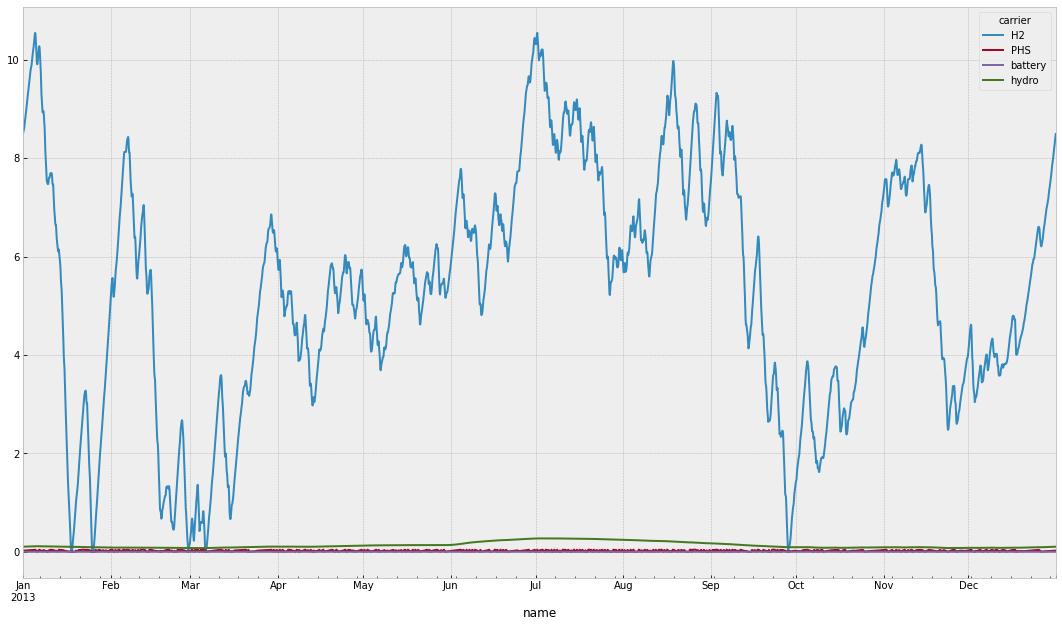

In [9]:
n = n_op

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

<AxesSubplot:xlabel='name'>

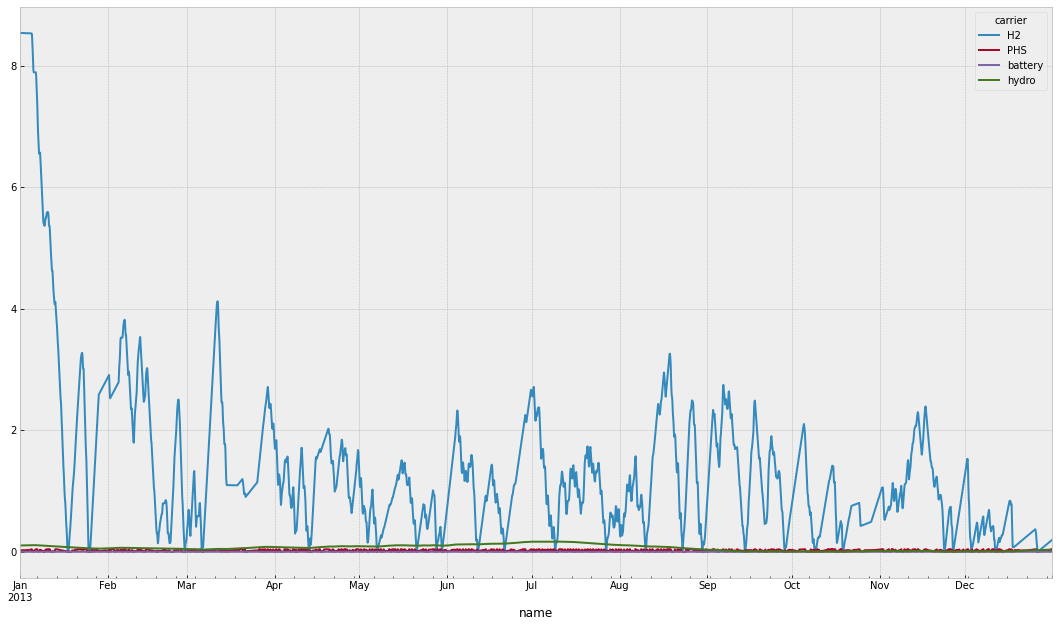

In [10]:
n = n_rh_sp_2w

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

<AxesSubplot:xlabel='name'>

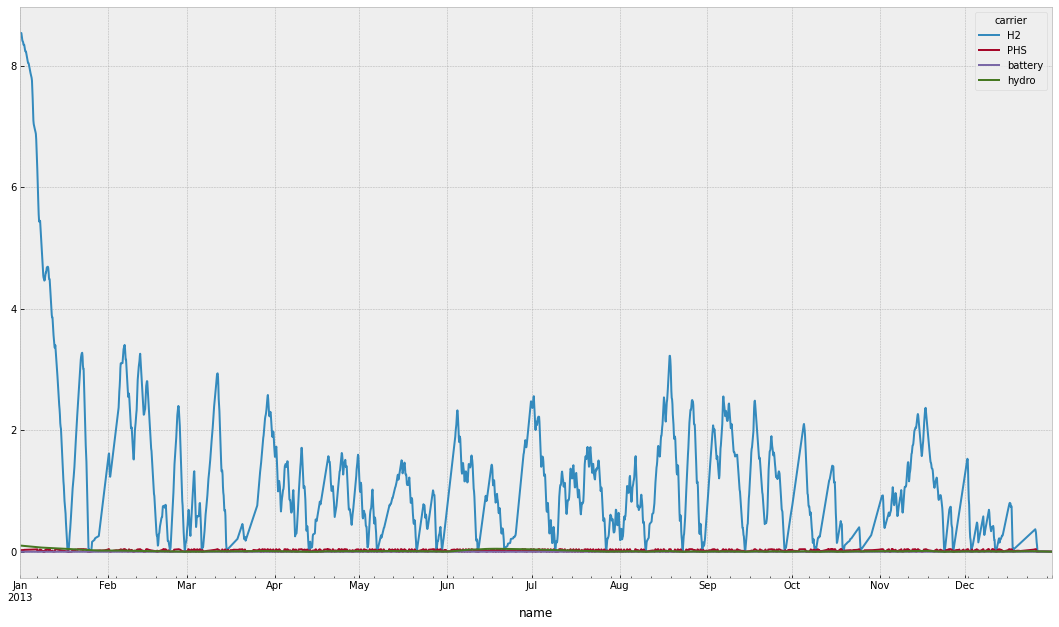

In [11]:
n = n_de_rh

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

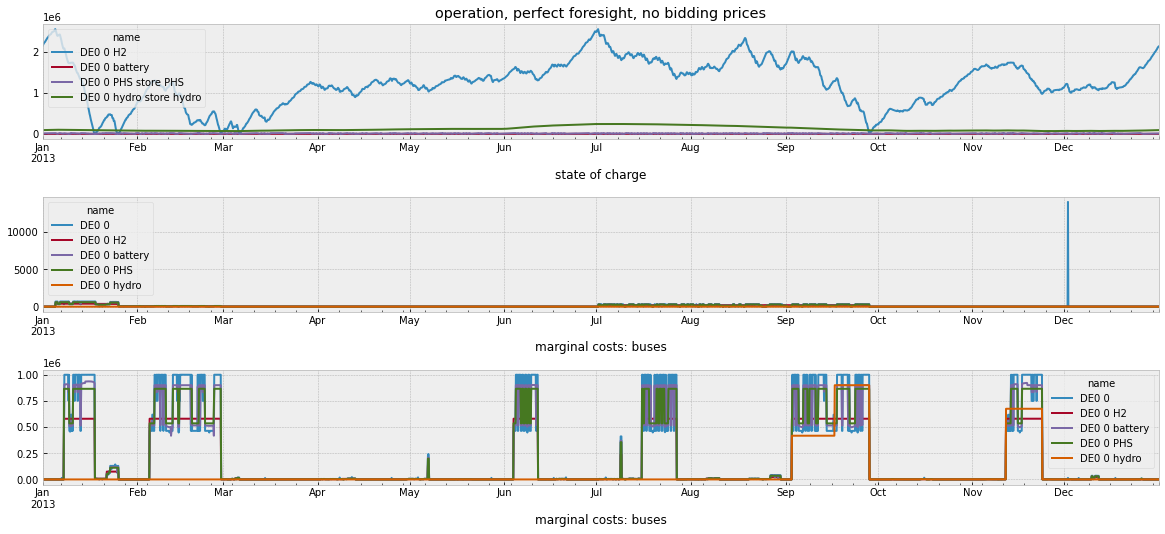

In [12]:
where='2013'

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,8))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n_op.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax1)
ax1.set_title('operation, perfect foresight, no bidding prices')
ax1.set_xlabel('state of charge')

n_op.buses_t.marginal_price.filter(like='DE0 0').loc[where].plot(ax=ax2)
ax2.set_xlabel('marginal costs: buses')

n_rh_sp_2w.buses_t.marginal_price.filter(like='DE0 0').loc[where].plot(ax=ax3)
ax3.set_xlabel('marginal costs: buses')

#fig.savefig(f'../plots/01-operation.jpeg')
plt.show()

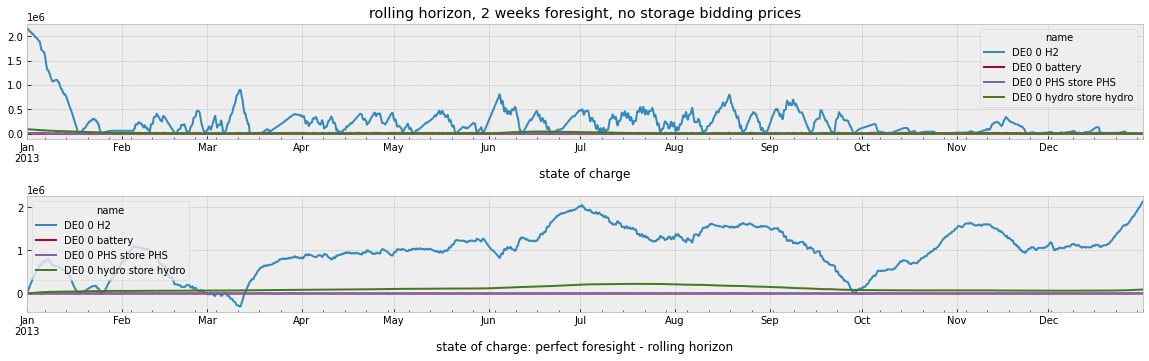

In [13]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(20,5))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n_de_rh.stores_t.e.filter(like='DE0 0').plot(ax=ax1)
ax1.set_title('rolling horizon, 2 weeks foresight, no storage bidding prices')
ax1.set_xlabel('state of charge')

(n_op.stores_t.e.filter(like='DE0 0')-n_de_rh.stores_t.e.filter(like='DE0 0')).plot(ax=ax2)
ax2.set_xlabel('state of charge: perfect foresight - rolling horizon')

#fig.savefig(f'../plots/02-rh.jpeg')
plt.show()

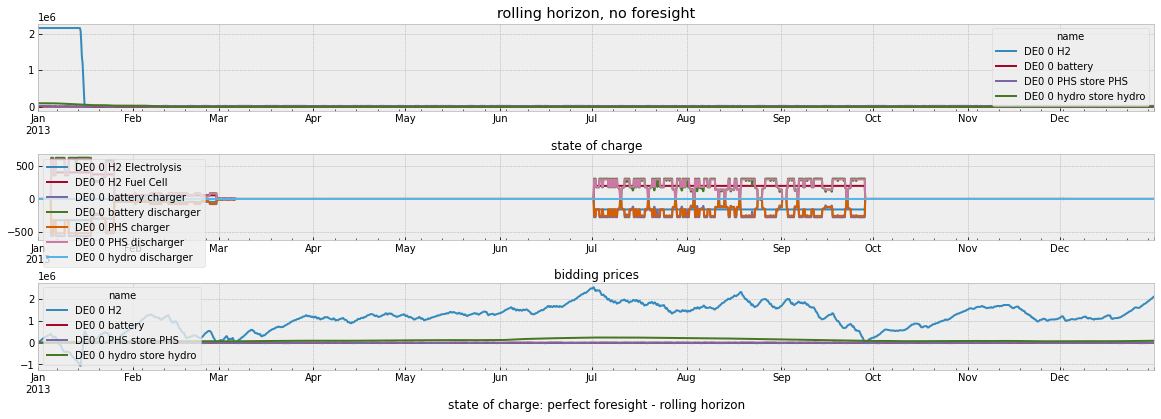

In [14]:
where='2013'

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,6))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n_rh_sp_3h.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax1)
ax1.set_title('rolling horizon, no foresight')
ax1.set_xlabel('state of charge')

n_rh_sp_3h.links_t.marginal_cost.filter(like='DE0 0').loc[where].plot(ax=ax2)
ax2.set_xlabel('bidding prices')

(n_op.stores_t.e.filter(like='DE0 0')-n_rh_sp_3h.stores_t.e.filter(like='DE0 0')).plot(ax=ax3)
ax3.set_xlabel('state of charge: perfect foresight - rolling horizon')

#fig.savefig(f'../plots/03-rh-h2.jpeg')
plt.show()

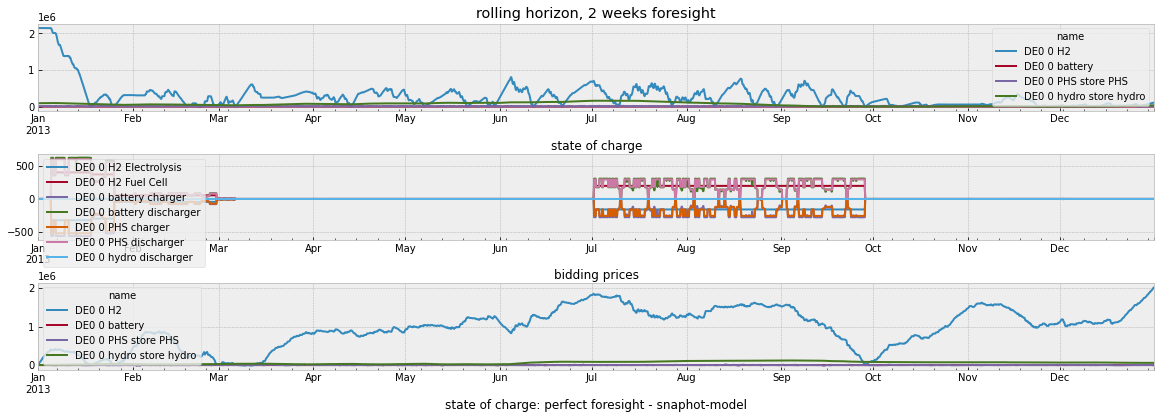

In [15]:
where='2013'

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,6))
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=.5, wspace=0)

n_rh_sp_2w.stores_t.e.filter(like='DE0 0').loc[where].plot(ax=ax1)
ax1.set_title('rolling horizon, 2 weeks foresight')
ax1.set_xlabel('state of charge')

n_rh_sp_2w.links_t.marginal_cost.filter(like='DE0 0').loc[where].plot(ax=ax2)
ax2.set_xlabel('bidding prices')

(n_op.stores_t.e.filter(like='DE0 0')-n_rh_sp_2w.stores_t.e.filter(like='DE0 0').filter(like='DE0 0')).plot(ax=ax3)
ax3.set_xlabel('state of charge: perfect foresight - snaphot-model')

#fig.savefig(f'../plots/{version}/04-rh-h2+b.jpeg')
plt.show()